<a href="https://colab.research.google.com/github/lewinskie254/eda/blob/main/EDA_For_Dummies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('http://ishelp.info/data/insurance.csv')

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df_age_19_male = df[(df['sex'] == 'male') & (df['age'] ==20)]
len(df_age_19_male)

15

In [6]:
from collections import Counter

counter = Counter(df_age_19_male['region'])
print(counter)

Counter({'northwest': 4, 'southwest': 4, 'northeast': 4, 'southeast': 3})


In [7]:
stats.mode(df['age'])

ModeResult(mode=np.int64(18), count=np.int64(69))

In [8]:
len(df[df['age'] == 18])

69

In [9]:
df.shape

(1338, 7)

In [10]:
np.min(df.charges)

1121.8739

In [11]:
lowest = df[df['charges'] == np.min(df.charges)]
lowest

,age,sex,bmi,children,smoker,region,charges
940,18,male,23.21,0,no,southeast,1121.8739


In [12]:
regions = df.region.unique()
regions

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [13]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [14]:
data = list(df.columns)
data

['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']

In [15]:
dicto = {i: df[i].nunique() for i in data}

In [16]:
dicto

{'age': 47,
 'sex': 2,
 'bmi': 548,
 'children': 6,
 'smoker': 2,
 'region': 4,
 'charges': 1337}

In [17]:
dicto_dtype = {i: df[i].dtype for i in data}

In [18]:
dicto_dtype

{'age': dtype('int64'),
 'sex': dtype('O'),
 'bmi': dtype('float64'),
 'children': dtype('int64'),
 'smoker': dtype('O'),
 'region': dtype('O'),
 'charges': dtype('float64')}

In [19]:
dicto_unique = {i: len(df[i].unique()) for i in data}

In [20]:
dicto_unique

{'age': 47,
 'sex': 2,
 'bmi': 548,
 'children': 6,
 'smoker': 2,
 'region': 4,
 'charges': 1337}

In [21]:
from pandas.api import types as ptypes

dict_api = {
    col: 'numeric' if ptypes.is_numeric_dtype(df[col])
         else 'categorical' if ptypes.is_categorical_dtype(df[col]) or ptypes.is_object_dtype(df[col])
         else 'other'
    for col in df.columns
}

dict_api


/tmp/ipython-input-58099680.py:5: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  else 'categorical' if ptypes.is_categorical_dtype(df[col]) or ptypes.is_object_dtype(df[col])


{'age': 'numeric',
 'sex': 'categorical',
 'bmi': 'numeric',
 'children': 'numeric',
 'smoker': 'categorical',
 'region': 'categorical',
 'charges': 'numeric'}

In [22]:
data_null = {i: df[i].isnull().sum() for i in df.columns}

In [23]:
data_null

{'age': np.int64(0),
 'sex': np.int64(0),
 'bmi': np.int64(0),
 'children': np.int64(0),
 'smoker': np.int64(0),
 'region': np.int64(0),
 'charges': np.int64(0)}

In [24]:
percentiles = [i*10 for i in range(11)]
values= np.percentile(df['charges'], percentiles)

In [25]:
dict_ranges = {i: len(df[df['charges'] <= i]) for i in values}

In [26]:
dict_ranges

{np.float64(1121.8739): 1,
 np.float64(2346.5336150000003): 134,
 np.float64(3991.5757200000003): 268,
 np.float64(5484.84677): 402,
 np.float64(7369.052730000001): 535,
 np.float64(9382.033): 669,
 np.float64(11399.85716): 803,
 np.float64(13767.875345): 936,
 np.float64(20260.626406000003): 1070,
 np.float64(34831.7197): 1204,
 np.float64(63770.42801): 1338}

In [27]:
items = [i for i in range(len(values))]

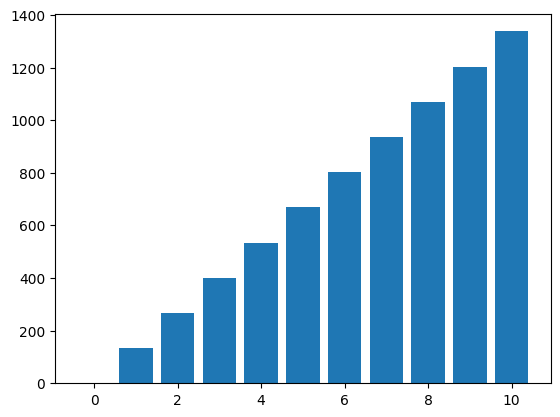

In [28]:
plt.bar(items, dict_ranges.values())
plt.show()

In [29]:
df.age

,age
0,19
1,18
2,28
3,33
4,32
...,...
1333,50
1334,18
1335,18
1336,21


In [30]:
df.age.unique()

array([19, 18, 28, 33, 32, 31, 46, 37, 60, 25, 62, 23, 56, 27, 52, 30, 34,
       59, 63, 55, 22, 26, 35, 24, 41, 38, 36, 21, 48, 40, 58, 53, 43, 64,
       20, 61, 44, 57, 29, 45, 54, 49, 47, 51, 42, 50, 39])

In [31]:
df.age.min()

18

In [32]:
df.age.max()

64

In [33]:
64-18

46

In [34]:
46/10

4.6

In [35]:
list_of_ages = [i for i in range(18, 70, 5)]
list_of_ages

[18, 23, 28, 33, 38, 43, 48, 53, 58, 63, 68]

In [36]:
mean_per_age_group = {f"({list_of_ages[i]} - {list_of_ages[i+1]})" : df[df['age'] < list_of_ages[i+1]]['charges'].mean() for i in range(len(list_of_ages)-1)}

In [37]:
mean_per_age_group

{'(18 - 23)': np.float64(8375.014415175676),
 '(23 - 28)': np.float64(9098.19224795304),
 '(28 - 33)': np.float64(9431.709042050301),
 '(33 - 38)': np.float64(10174.583708123397),
 '(38 - 43)': np.float64(10300.814054727152),
 '(43 - 48)': np.float64(11253.919369820313),
 '(48 - 53)': np.float64(11828.641135960577),
 '(53 - 58)': np.float64(12363.015804769168),
 '(58 - 63)': np.float64(12982.527724469452),
 '(63 - 68)': np.float64(13270.422265141257)}

In [38]:
mean_per_age_group.values()

dict_values([np.float64(8375.014415175676), np.float64(9098.19224795304), np.float64(9431.709042050301), np.float64(10174.583708123397), np.float64(10300.814054727152), np.float64(11253.919369820313), np.float64(11828.641135960577), np.float64(12363.015804769168), np.float64(12982.527724469452), np.float64(13270.422265141257)])

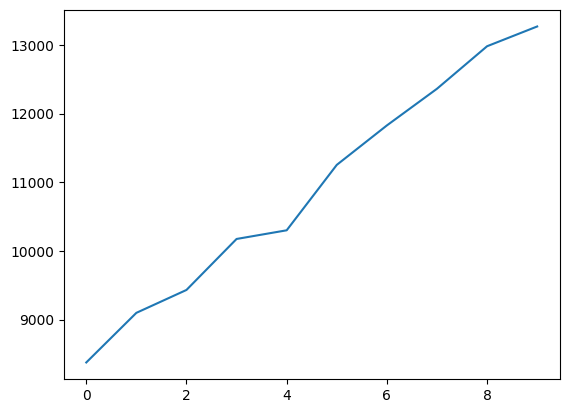

In [39]:
plt.plot(mean_per_age_group.values())

<BarContainer object of 10 artists>

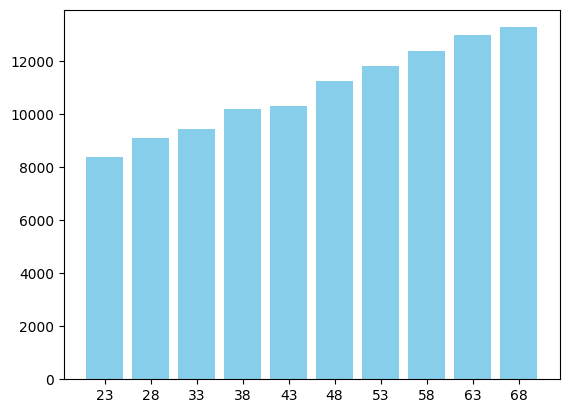

In [40]:
plt.bar([str(list_of_ages[i]) for i in range(1, len(list_of_ages))], mean_per_age_group.values(), color='skyblue')

In [41]:
df.charges.std()

12110.011236693994

(array([66., 70., 55., 51., 45., 61., 55., 35., 49., 49., 34., 56., 35.,
        47., 33., 40., 47., 41., 36., 29., 24., 21.,  8.,  9.,  9., 10.,
        11.,  9., 15., 13., 11.,  9., 12., 10.,  4.,  9.,  7., 12.,  5.,
         7.,  3.,  8.,  4.,  5.,  5.,  2.,  5.,  1.,  1.,  1.,  3.,  3.,
         7.,  8.,  4.,  8.,  4.,  8.,  6.,  8.,  6.,  9.,  6.,  7.,  2.,
         8.,  5.,  2.,  7.,  5.,  1.,  7.,  4.,  7.,  3.,  5.,  3.,  1.,
         0.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,
         1.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  1.]),
 array([ 1121.8739   ,  1748.3594411,  2374.8449822,  3001.3305233,
         3627.8160644,  4254.3016055,  4880.7871466,  5507.2726877,
         6133.7582288,  6760.2437699,  7386.729311 ,  8013.2148521,
         8639.7003932,  9266.1859343,  9892.6714754, 10519.1570165,
        11145.6425576, 11772.1280987, 12398.6136398, 13025.0991809,
        13651.584722 , 14278.0702631, 14904.5558042, 15531.0413453,
        16157.5268864, 167

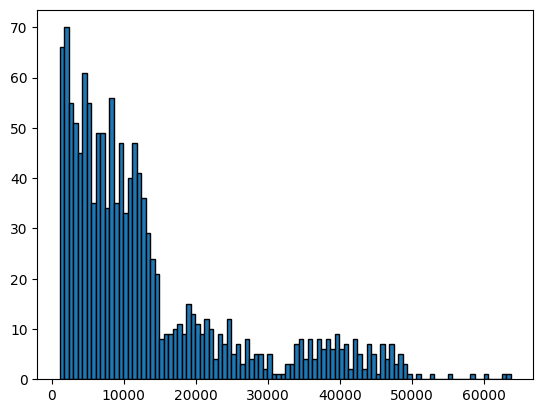

In [42]:
plt.hist(df.charges, bins=100, edgecolor='black')

<Axes: xlabel='charges', ylabel='Count'>

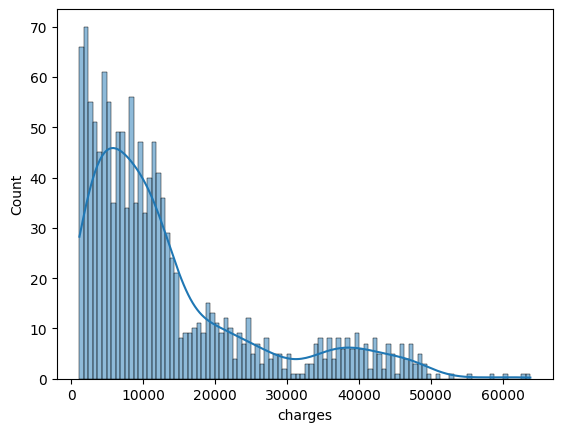

In [43]:
import seaborn as sns
sns.histplot(df.charges, bins=100, kde=True)  # kde=True adds a smooth density curve


In [44]:
np.std(df.charges)

12105.484975561605

In [45]:
from scipy.stats import skew, kurtosis

skew(df.charges, bias=False)

np.float64(1.5158796580240383)

In [46]:
kurtosis(df.charges, bias=False)

np.float64(1.6062986532967916)

In [47]:
df.charges.skew()

np.float64(1.5158796580240388)

In [48]:
df.charges.kurtosis()

np.float64(1.6062986532967907)

In [49]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [50]:
regions = df['region'].unique()
regions = {i : num for num, i in enumerate(regions)}
sex = df['sex'].unique()
sex = {i : num for num, i in enumerate(sex)}
smoker = df['smoker'].unique()
smoker = {i : num for num, i in enumerate(smoker)}

df['region'] = df['region'].map(regions)
df['sex'] = df['sex'].map(sex)
df['smoker'] = df['smoker'].map(smoker)

In [51]:
X = df[['age', 'children', 'bmi', 'region', 'sex', 'smoker']]
y = df['charges']

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y)
model = LinearRegression()
model.fit(X_train, y_train)
y_preds = model.predict(X_test)
def root_mean_squared(y, yhat):
    n = len(y)
    error = np.sqrt(np.sum((y - yhat)**2) / n)
    mean = np.mean(y)
    return f"{round(error/mean * 100, 2)} %"

error = root_mean_squared(y_test, y_preds)

In [53]:
df['charges'].describe()

,charges
count,1338.000000
mean,13270.422265
std,12110.011237
min,1121.873900
25%,4740.287150
50%,9382.033000
75%,16639.912515
max,63770.428010


In [54]:
error

'47.33 %'

In [55]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(random_state=0)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [56]:
y_preds = model.predict(X_test)

In [57]:
root_mean_squared(y_test, y_preds)

'38.6 %'

In [58]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10]
}

grid = GridSearchCV(RandomForestRegressor(random_state=0), params, cv=5, scoring='neg_root_mean_squared_error')
grid.fit(X_train, y_train)

print("Best RMSE:", -grid.best_score_)
print("Best params:", grid.best_params_)


KeyboardInterrupt: 

In [ ]:
f"{round(4687.573179282222/np.mean(df.charges)*100, 2)}%"

In [ ]:
!pip install xgboost

In [ ]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

xgb_model = XGBRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=0
)

xgb_model.fit(X_train, y_train)


In [ ]:
y_pred_xgb = xgb_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
print("XGBoost RMSE:", rmse)
print("Relative Error (%):", round(rmse / np.mean(df.charges) * 100, 2))


In [ ]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators': [200, 500, 800],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

grid_xgb = GridSearchCV(
    XGBRegressor(random_state=0),
    params,
    cv=5,
    scoring='neg_root_mean_squared_error',
    verbose=1
)

grid_xgb.fit(X_train, y_train)

print("Best RMSE:", -grid_xgb.best_score_)
print("Best params:", grid_xgb.best_params_)


In [ ]:
print("Relative Error (%):", round(-grid_xgb.best_score_ / np.mean(df.charges) * 100, 2))

In [71]:
type(X_train)

torch.Tensor

#Let's try out a neural net for this next part

In [61]:
import torch
import torch.nn as nn
from torch.optim import Adam

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [62]:
class Model(nn.Module):
    def __init__(self, in_features, hidden_features, out_features):
        super(Model, self).__init__()
        self.layer_1 = nn.Linear(in_features, hidden_features)
        self.layer_2 = nn.Linear(hidden_features, out_features)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.layer_1(x)
        x = self.relu(x)
        x = self.layer_2(x)
        return x

In [93]:
X = df[['age', 'children', 'bmi', 'region', 'sex', 'smoker']]
y = df['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y)

# --- Model, Loss, Optimizer ---
model = Model(6, 120, 1).to(device)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
epochs = 150000

# --- Move data to device ---
X_train = torch.from_numpy(X_train.to_numpy()).float().to(device)
y_train = torch.from_numpy(y_train.to_numpy().reshape(-1, 1)).float().to(device)
X_test = torch.from_numpy(X_test.to_numpy()).float().to(device)
y_test = torch.from_numpy(y_test.to_numpy().reshape(-1, 1)).float().to(device)

def root_mean_squared(y, yhat):
    # Convert PyTorch tensors to NumPy arrays safely
    if isinstance(y, torch.Tensor):
        y = y.detach().cpu().numpy()
    if isinstance(yhat, torch.Tensor):
        yhat = yhat.detach().cpu().numpy()

    n = len(y)
    error = np.sqrt(np.sum((y - yhat) ** 2) / n)
    mean = np.mean(y)
    return f"{round(error / mean * 100, 2)} %"



# --- Training loop ---
for i in range(epochs):
    model.train()
    optimizer.zero_grad()

    y_preds = model(X_train)
    loss = criterion(y_preds, y_train)
    loss.backward()
    optimizer.step()

    if i % 1000 == 0:
        model.eval()
        with torch.no_grad():
            test_preds = model(X_test)
            print(f"Epoch {i}: {root_mean_squared(y_test, test_preds)}")
        model.train()


Epoch 0: 135.36000061035156 %
Epoch 1000: 91.05999755859375 %
Epoch 2000: 86.94000244140625 %
Epoch 3000: 86.58999633789062 %
Epoch 4000: 86.23999786376953 %
Epoch 5000: 85.80000305175781 %
Epoch 6000: 85.13999938964844 %
Epoch 7000: 83.9800033569336 %
Epoch 8000: 82.05000305175781 %
Epoch 9000: 79.43000030517578 %
Epoch 10000: 76.37000274658203 %
Epoch 11000: 73.08000183105469 %
Epoch 12000: 69.69000244140625 %
Epoch 13000: 66.20999908447266 %
Epoch 14000: 62.63999938964844 %
Epoch 15000: 59.099998474121094 %
Epoch 16000: 55.70000076293945 %
Epoch 17000: 52.529998779296875 %
Epoch 18000: 49.70000076293945 %
Epoch 19000: 47.310001373291016 %
Epoch 20000: 45.43000030517578 %
Epoch 21000: 43.93000030517578 %
Epoch 22000: 42.81999969482422 %
Epoch 23000: 42.029998779296875 %
Epoch 24000: 41.41999816894531 %
Epoch 25000: 40.97999954223633 %
Epoch 26000: 40.63999938964844 %
Epoch 27000: 40.31999969482422 %
Epoch 28000: 39.9900016784668 %
Epoch 29000: 39.66999816894531 %
Epoch 30000: 39.3400